#Importing necessary Libraries

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#Reading the CSV File

In [3]:
df=pd.read_csv("C:\\Users\Admin\Downloads\Datatrained Projects\happiness_score_dataset.csv")

#Checking the first and last 5 rows to validate the count of rows and columns

In [4]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


#Total 158 rows and 12 columns

In [6]:
df.shape # Checking the No of rows and columns so that it matches with the data found above

(158, 12)

In [7]:
df.describe() #Checking basic statistical details

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [8]:
df.info

<bound method DataFrame.info of          Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  

In [9]:
df.isnull() # Checking if anywhere isnull can be located in the dataframe

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum() #Cross checking the null values with checking its sum 

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

#As per the above inference, no null values are there. So the dataset is good to proceed with

In [11]:
df.dtypes #Check all the datatypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [13]:
#Check for the values of each column
#lets make a for loop to see the values of each columns
column=df.columns.values
for i in column:
    r=df[i].describe()
    print(r)

count        158
unique       158
top       Cyprus
freq           1
Name: Country, dtype: object
count                    158
unique                    10
top       Sub-Saharan Africa
freq                      40
Name: Region, dtype: object
count    158.000000
mean      79.493671
std       45.754363
min        1.000000
25%       40.250000
50%       79.500000
75%      118.750000
max      158.000000
Name: Happiness Rank, dtype: float64
count    158.000000
mean       5.375734
std        1.145010
min        2.839000
25%        4.526000
50%        5.232500
75%        6.243750
max        7.587000
Name: Happiness Score, dtype: float64
count    158.000000
mean       0.047885
std        0.017146
min        0.018480
25%        0.037268
50%        0.043940
75%        0.052300
max        0.136930
Name: Standard Error, dtype: float64
count    158.000000
mean       0.846137
std        0.403121
min        0.000000
25%        0.545808
50%        0.910245
75%        1.158448
max        1.690420
Name: E

#Visualizing the Data

<AxesSubplot:xlabel='Region', ylabel='Happiness Score'>

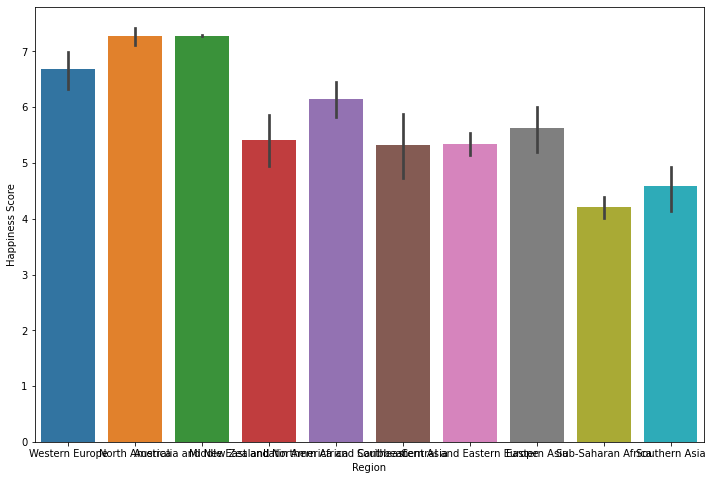

In [14]:
pl=plt.figure(figsize=(12,8))
sns.barplot(x="Region",y="Happiness Score",data=df)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

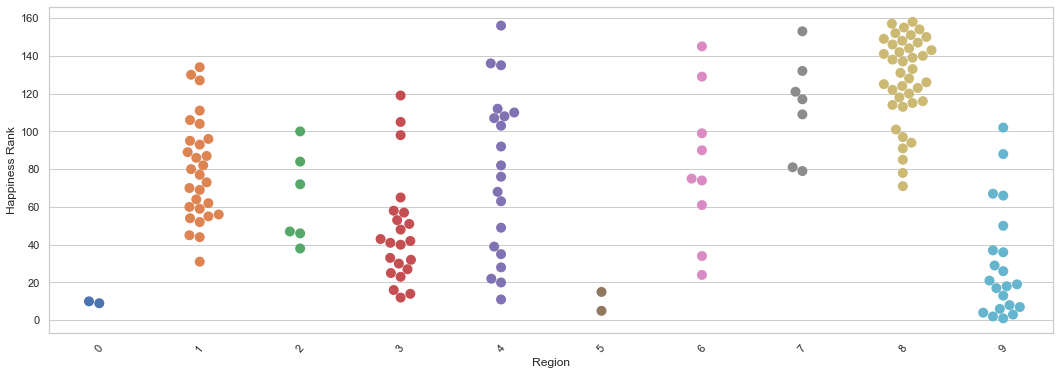

In [60]:
#Checking happiness rank according to region using swarm plot
sns.set(style='whitegrid')
plt.figure(figsize=(18,6))
sns.swarmplot(x="Region", y="Happiness Rank", data=df,size=10)
plt.xticks(rotation=50)

<AxesSubplot:xlabel='Happiness Rank', ylabel='Happiness Score'>

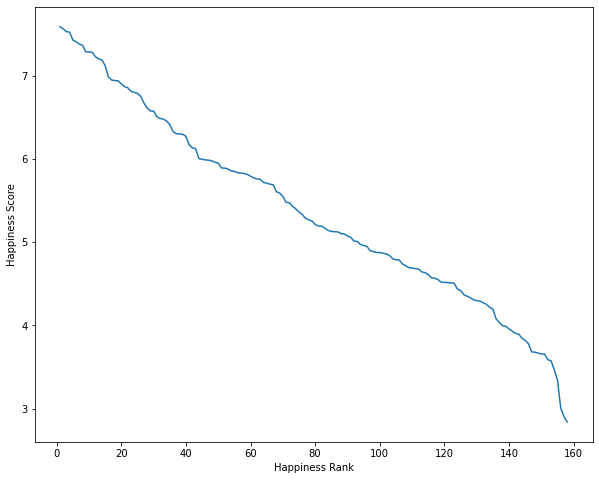

In [15]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Happiness Rank',y="Happiness Score",data=df)

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

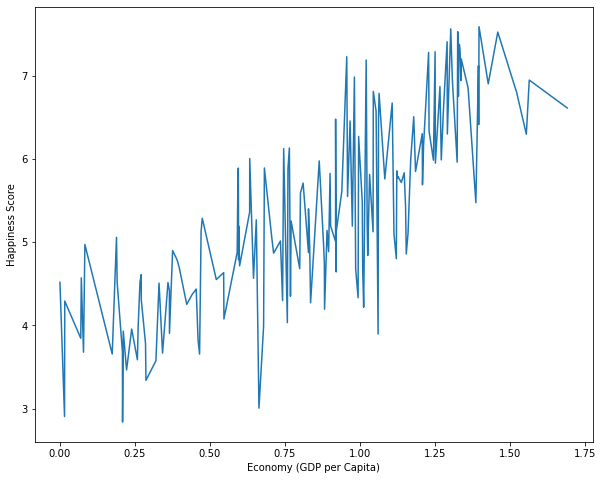

In [16]:
plt.figure(figsize=(10,8))
sns.lineplot(x="Economy (GDP per Capita)",y="Happiness Score",data=df)

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

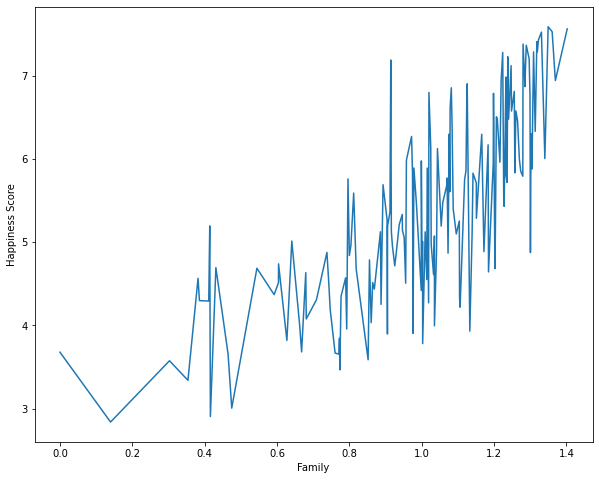

In [18]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Family',y="Happiness Score",data=df)

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

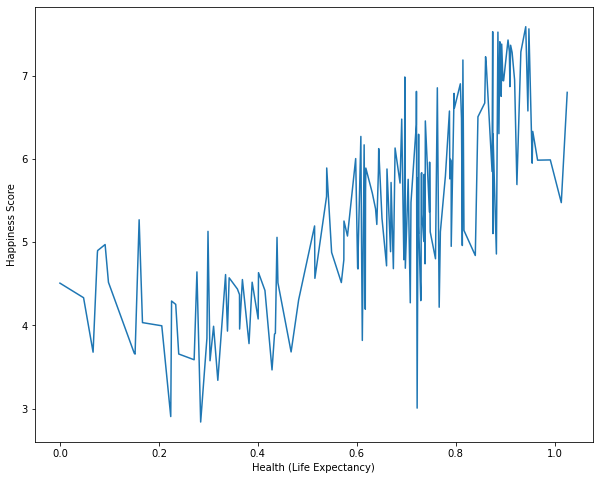

In [30]:
plt.figure(figsize=(10,8))
sns.lineplot(x="Health (Life Expectancy)",y="Happiness Score",data=df)

<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

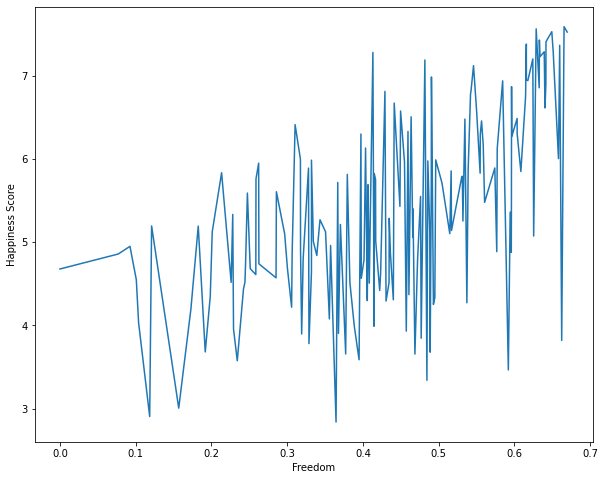

In [20]:
plt.figure(figsize=(10,8))
sns.lineplot(x="Freedom",y="Happiness Score",data=df)

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

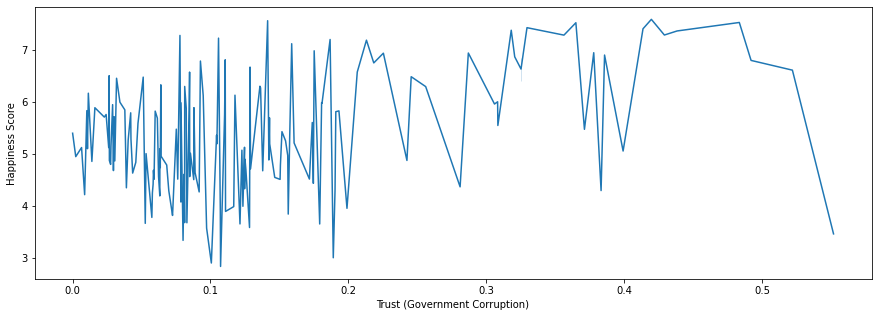

In [31]:
plt.figure(figsize=(15,5))
sns.lineplot(x="Trust (Government Corruption)",y="Happiness Score",data=df)

<AxesSubplot:xlabel='Country', ylabel='Happiness Score'>

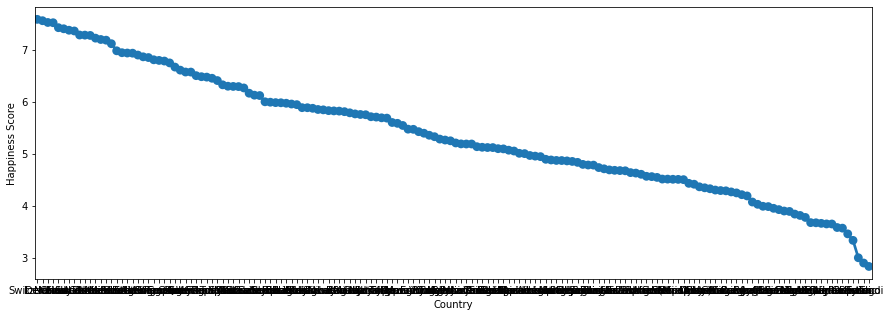

In [33]:
plt.figure(figsize=(15,5))
sns.pointplot(x="Country",y="Happiness Score",data=df)

<AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>

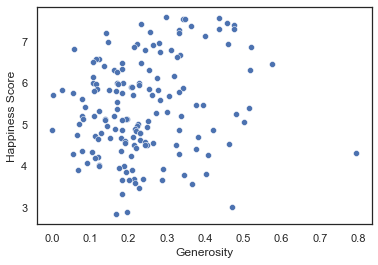

In [62]:
sns.scatterplot(x='Generosity',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Dystopia Residual'>

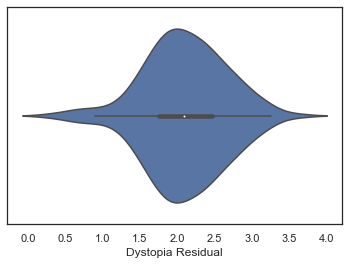

In [61]:
#Checking the distribution of Dystopia Residual using violin plot
sns.set_style('white')
sns.violinplot(x='Dystopia Residual',data=df)

<AxesSubplot:>

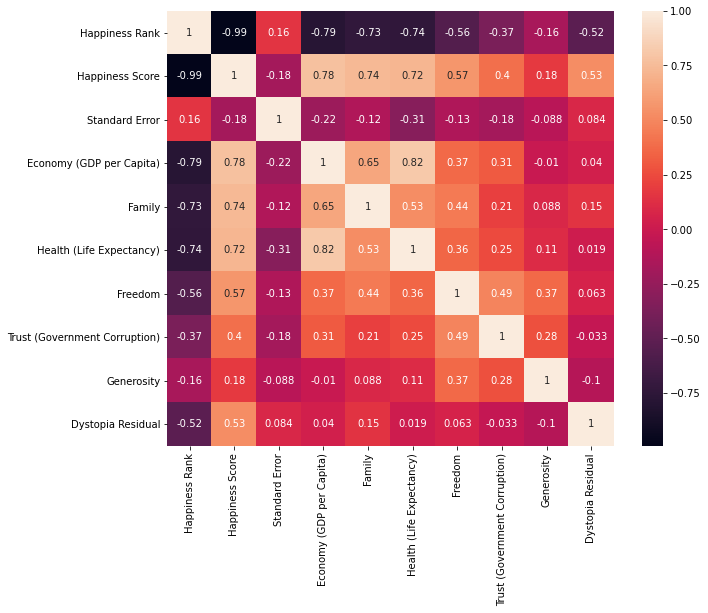

In [35]:
#Correlation with heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

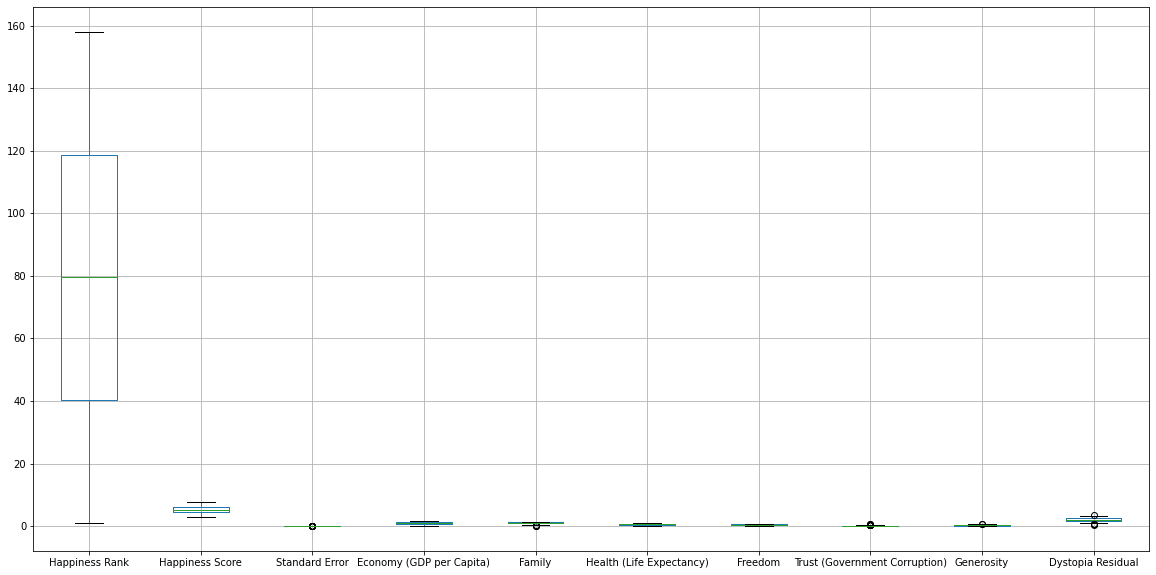

In [38]:
#Checking for any outliers
plt.figure(figsize=(20,10))
df.boxplot()

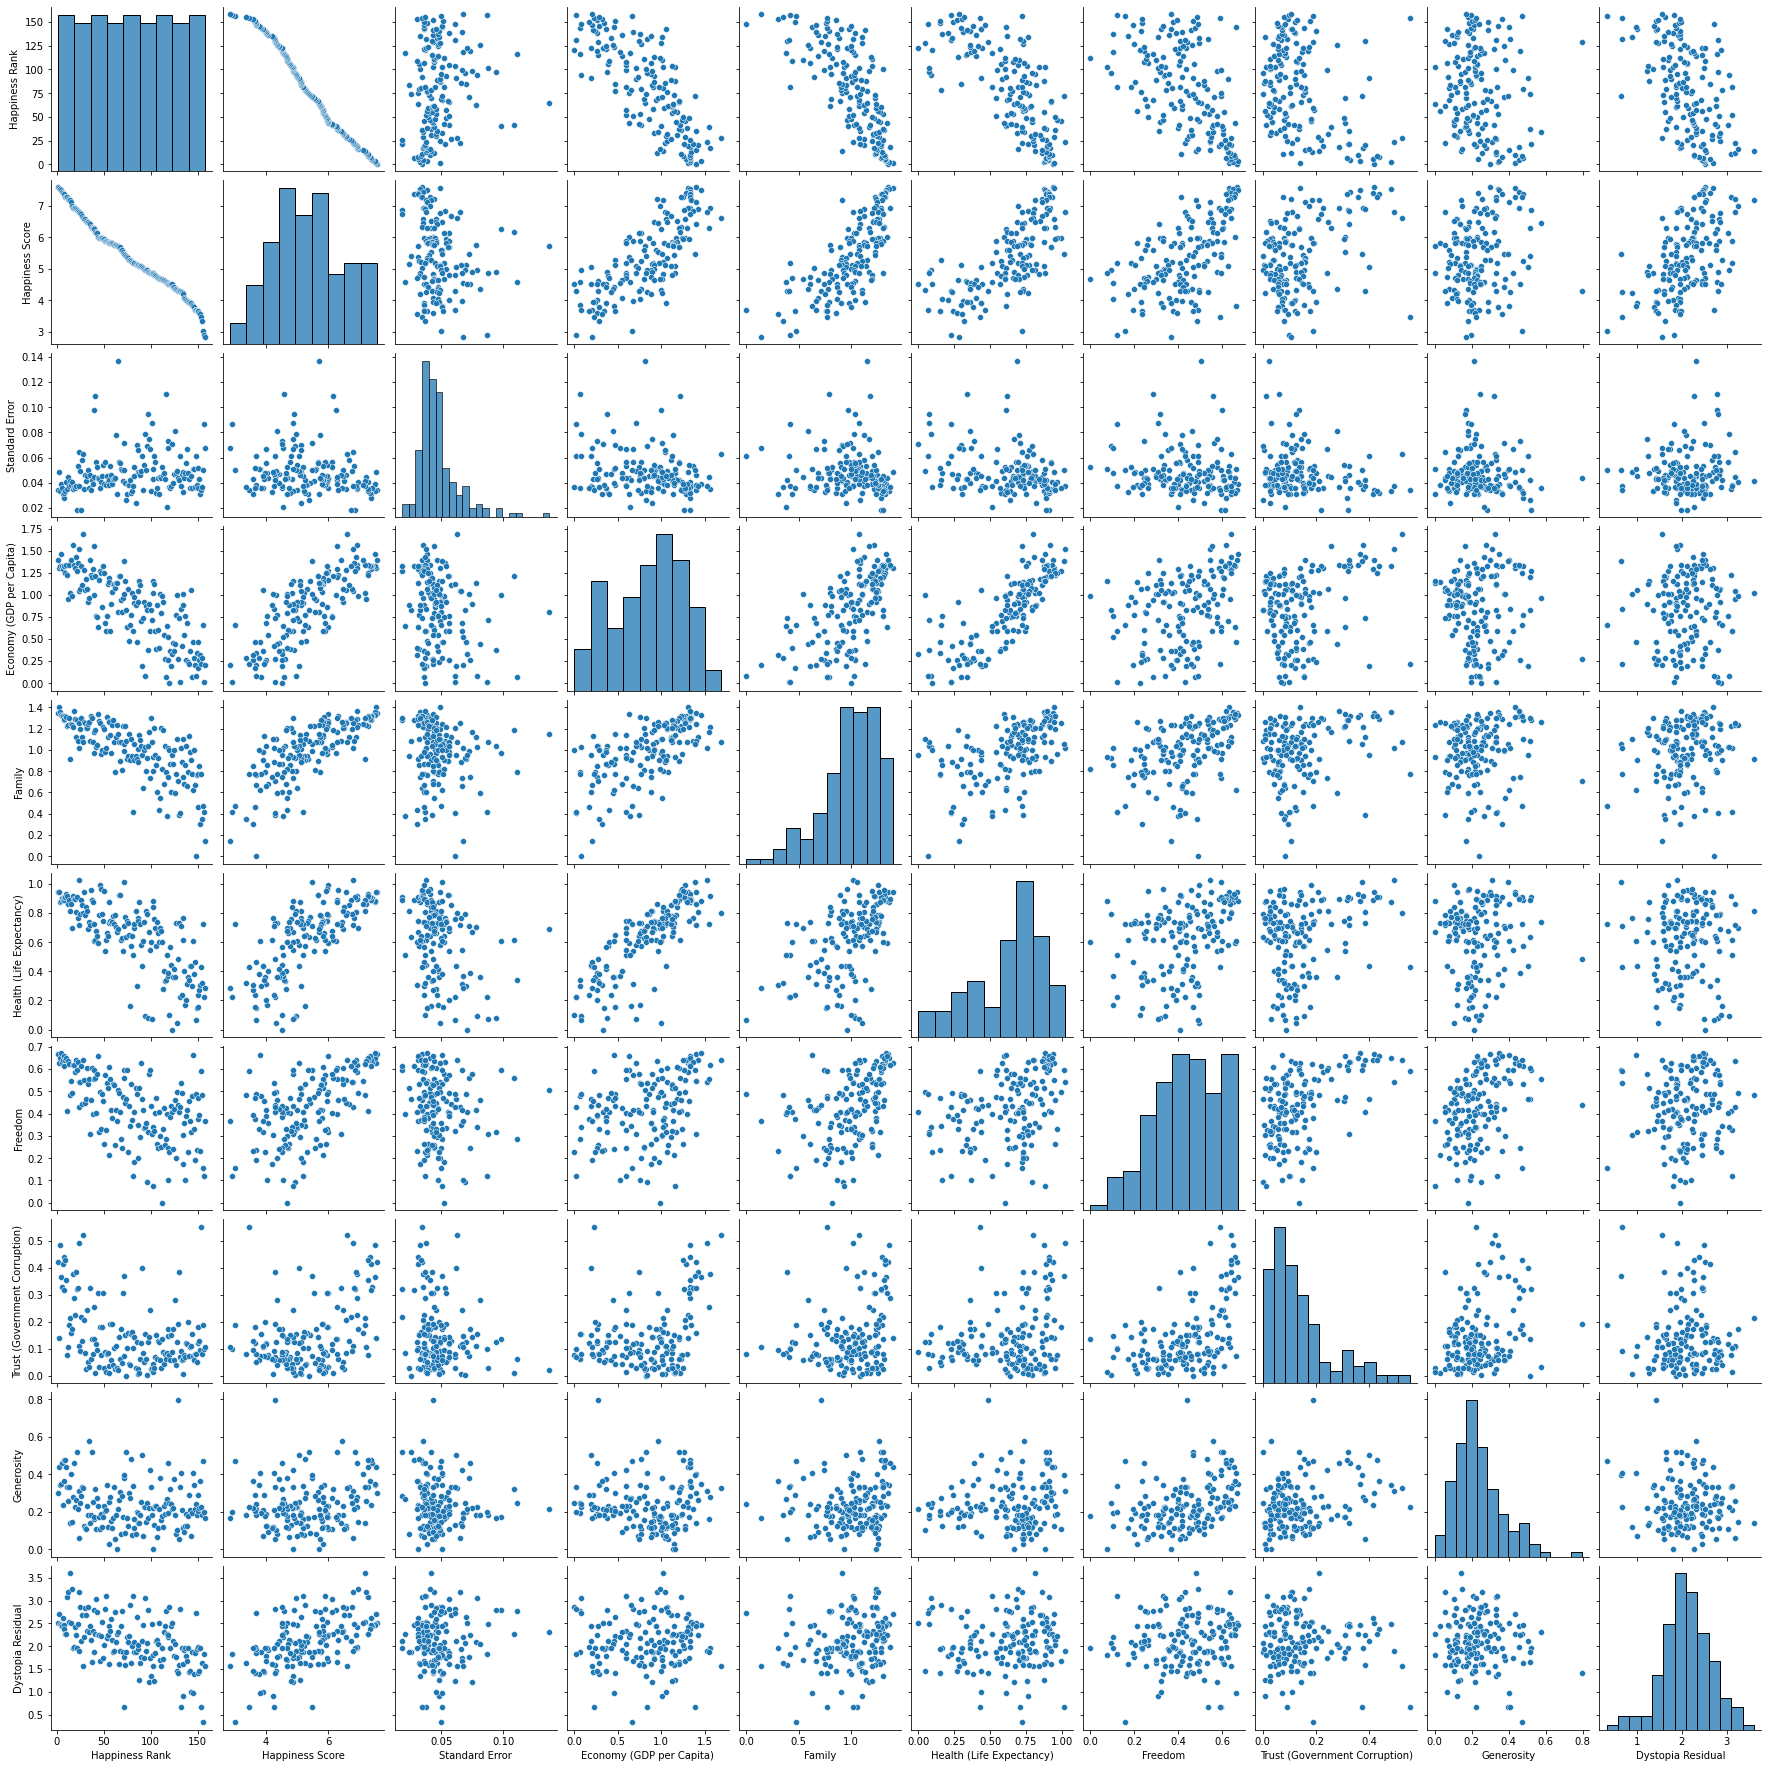

In [39]:
sns.pairplot(df)

In [41]:
df.dtypes

Country                            int32
Region                             int32
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [63]:
#Checking correlation of the dataset
corr=df.corr() 
corr

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


In [42]:
#Converting to numeric with Label Encoder
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
c=['Country','Region']
for i in c:
    df[i]=l.fit_transform(df[i])

In [43]:
df.dtypes

Country                            int64
Region                             int64
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

#All int32 converted to int64

Process of removing outliers

In [44]:
from scipy.stats import zscore
zscore=np.abs(zscore(df))
print(np.where(zscore>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([ 9,  4,  4,  4, 10,  6,  9, 11,  6], dtype=int64))


In [48]:
#Outlier removal
df_updated=df[(zscore<3).all(axis=1)]

In [49]:
df.shape

(158, 12)

In [50]:
df_updated.shape

(149, 12)

In [51]:
#Dividing dataset into input and output
df_x=df_updated.drop(columns=["Happiness Score"])
y=df_updated[["Happiness Score"]]

In [52]:
print(df_x.shape)
print(y.shape)

(149, 11)
(149, 1)


In [53]:
#Checking skewness
df_x.skew()

Country                          0.048701
Region                          -0.096985
Happiness Rank                   0.003268
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

In [54]:
for index in df_x.skew().index:
    if df_x.skew().loc[index]>0.55:
        df_x[index]=np.cbrt(df_x[index])

In [55]:
df_x.skew()

Country                          0.048701
Region                          -0.096985
Happiness Rank                   0.003268
Standard Error                   0.528395
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)   -0.064568
Generosity                      -1.087392
Dystopia Residual               -0.021144
dtype: float64

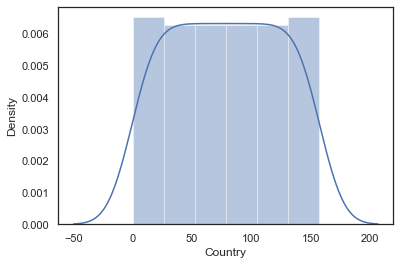

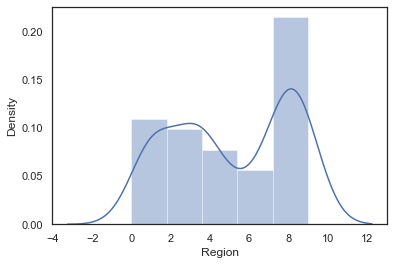

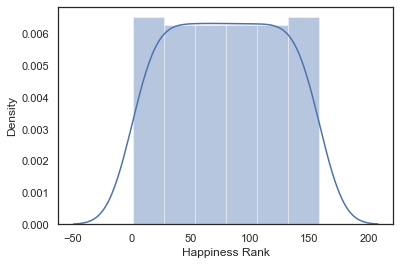

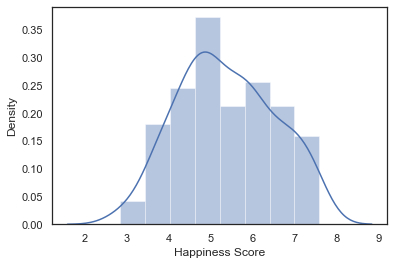

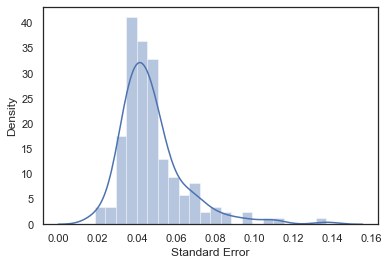

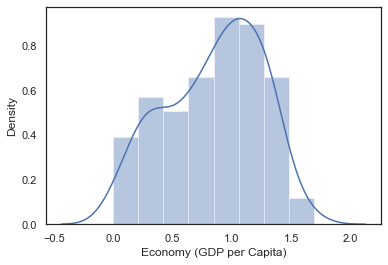

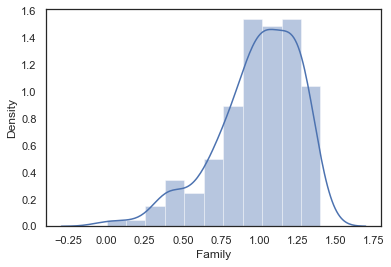

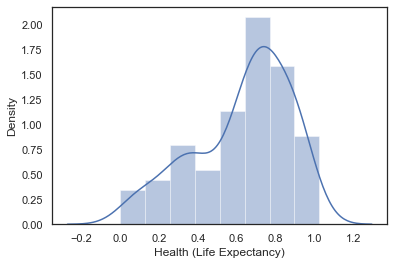

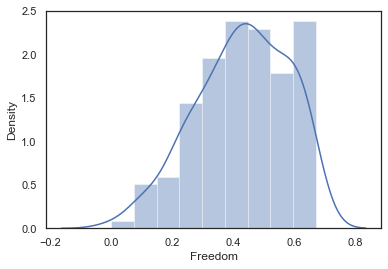

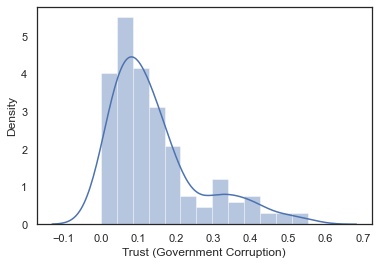

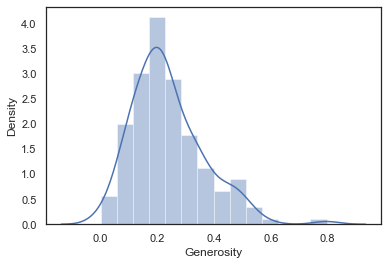

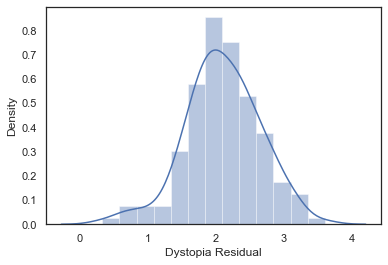

In [64]:
#Checking distribution of data using distribution plot
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()

Model Training

In [65]:
x=df_updated.drop('Happiness Score',axis=1)   #Independent variable
y=df_updated['Happiness Score']    #Dependent or Target Variabl

In [66]:
x.head()

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [67]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 149, dtype: float64

In [68]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')  #Transforming x data

In [70]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.26826032,  1.29683671, -1.71390512, ...,  1.88683529,
         0.62010055,  0.7568764 ],
       [-0.41741515,  1.29683671, -1.69153548, ...,  0.27941205,
         1.37425481,  1.10929978],
       [-0.87714482,  1.29683671, -1.66916583, ...,  2.14203323,
         0.88302876,  0.70850719],
       ...,
       [-1.68714472,  0.63509469,  1.68628086, ..., -0.15304962,
         1.01352168, -0.32213507],
       [-1.40255016,  0.9659657 ,  1.73102015, ..., -0.35566049,
        -0.20234572, -0.9307015 ],
       [-1.22741505,  0.9659657 ,  1.77575944, ..., -0.11531156,
        -0.08023263, -0.54943602]])

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [72]:
best_rstate=0
accuracy=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print('At random state',i,',the model performs well')
        print('Training r2_score is: ',r2_score(y_train,pred_train)*100)
        print('Testing r2_score is: ',r2_score(y_test,pred_test)*100)

At random state 0 ,the model performs well
Training r2_score is:  99.73241115146547
Testing r2_score is:  99.7313030451178
At random state 39 ,the model performs well
Training r2_score is:  99.73298336464008
Testing r2_score is:  99.72616851270513
At random state 104 ,the model performs well
Training r2_score is:  99.73032124052234
Testing r2_score is:  99.72929660964454
At random state 151 ,the model performs well
Training r2_score is:  99.72886019410694
Testing r2_score is:  99.72729676691192
At random state 181 ,the model performs well
Training r2_score is:  99.73154669338243
Testing r2_score is:  99.72721674566442
At random state 185 ,the model performs well
Training r2_score is:  99.7309455534831
Testing r2_score is:  99.72865897297886
At random state 211 ,the model performs well
Training r2_score is:  99.73288929135458
Testing r2_score is:  99.73478928149197
At random state 225 ,the model performs well
Training r2_score is:  99.7335676728693
Testing r2_score is:  99.7284243558446

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=935,test_size=.20)

In [74]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

# Linear Regression

In [75]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print('Accuracy: ',r2score*100)
print('Cross Validation score: ',cvscore*100)
print('Difference: ',(r2score-cvscore)*100)

Accuracy:  99.80231258838438
Cross Validation score:  99.45593476328945
Difference:  0.34637782509493453


In [76]:
print('Linear Regression: \n')
print('Mean Squared Error: ',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,y_pred)))

Linear Regression: 

Mean Squared Error:  0.002415168291012431
Root Mean Squared Error:  0.049144361741835965


# Random Forest Regressor

In [77]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5).mean()
print('Accuracy: ',r2score*100)
print('Cross Validation score: ',cvscore*100)
print('Difference: ',(r2score-cvscore)*100)

Accuracy:  99.8340989659669
Cross Validation score:  99.31427275070949
Difference:  0.5198262152574129


In [78]:
print('Random Forest Regressor: \n')
print('Mean Squared Error: ',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,y_pred)))

Random Forest Regressor: 

Mean Squared Error:  0.0020268307099998847
Root Mean Squared Error:  0.04502033662690545


# Gradient Boosting Regressor

In [79]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y): #Def is used such that we can call it later
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print()
    print('Accuracy correponding to best random state',final_r_state,'is',max_r_score*100)
    return final_r_state

In [80]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,100]} 
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x_train,y_train)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [81]:
gbr=GradientBoostingRegressor(learning_rate= 0.1, n_estimators= 100)
r_state=maxr2_score(gbr,x,y)


Accuracy correponding to best random state 65 is 99.92218547081923


In [82]:
#Finding cross validation value
cvscore=cross_val_score(gbr,x_train,y_train,cv=5).mean()
print('Cross Validation score is: ',cvscore*100)

Cross Validation score is:  99.44422668181947


In [83]:
print('Gradient Boosting Regressor: \n')
print('Mean Squared Error: ',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,y_pred)))

Gradient Boosting Regressor: 

Mean Squared Error:  0.0020268307099998847
Root Mean Squared Error:  0.04502033662690545


From the above algorithms, It is observed that Gradient Boost Regressor is giving the best accuracy of 99.92 and cross validation of 99.44, which is the highest among all.

Saving the model

In [84]:
import joblib
joblib.dump(gbr,'WorldHappinessScore.pkl')

['WorldHappinessScore.pkl']